<a href="https://colab.research.google.com/github/Eperlow57/Esther-Perlow-Portfolio/blob/main/college-student-performance-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("enhanced_student_habits_performance_dataset.csv")
df.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


In [ ]:
print(df.shape)
print(df.info())
print(df.isnull().sum())
print(df.isna().sum())
print(df.duplicated().sum())
df2 = df.drop('student_id', axis=1)
df2['part_time_job'] = df2['part_time_job'].map({'Yes': True, 'No': False})
df2['access_to_tutoring'] = df2['access_to_tutoring'].map({'Yes': True, 'No': False})
print(df.info())

(80000, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2   gender                         80000 non-null  object 
 3   major                          80000 non-null  object 
 4   study_hours_per_day            80000 non-null  float64
 5   social_media_hours             80000 non-null  float64
 6   netflix_hours                  80000 non-null  float64
 7   part_time_job                  80000 non-null  object 
 8   attendance_percentage          80000 non-null  float64
 9   sleep_hours                    80000 non-null  float64
 10  diet_quality                   80000 non-null  object 
 11  exercise_frequency             80000 non-null  int64  
 12  parental_education_level       800

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

The created instance of the scale was used in the code for the models

## Histograms



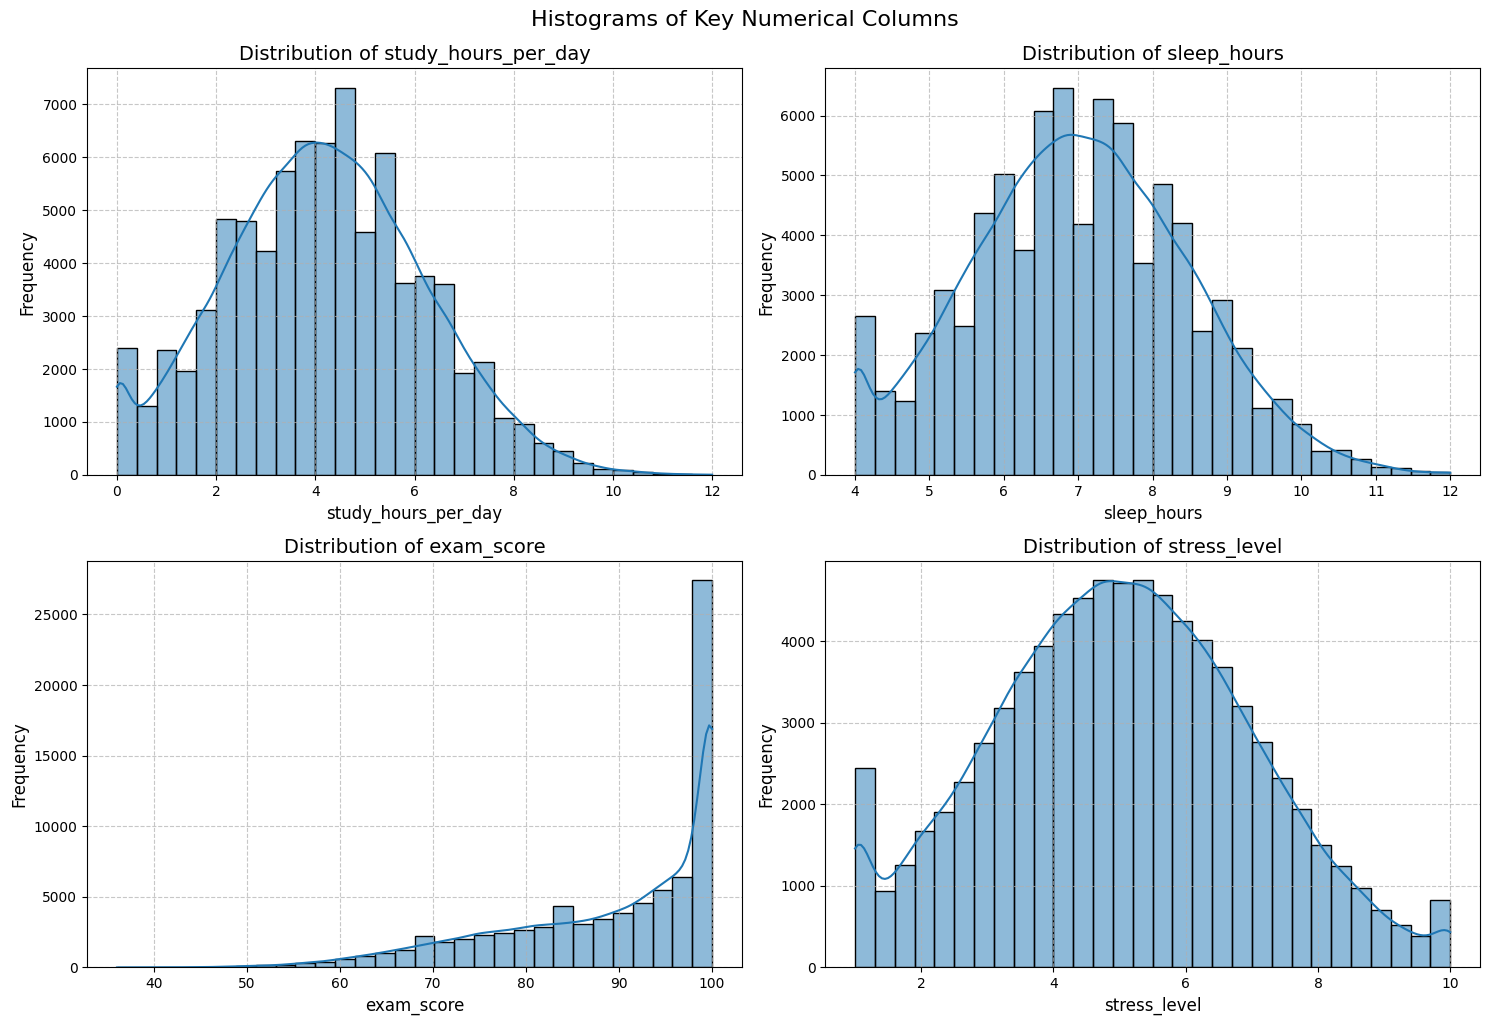

In [ ]:
# Select a few numerical columns for histograms
hist_cols = ['study_hours_per_day', 'sleep_hours', 'exam_score', 'stress_level']

plt.figure(figsize=(15, 10))
for i, col in enumerate(hist_cols):
    plt.subplot(2, 2, i + 1) # Create a 2x2 grid of subplots
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.suptitle('Histograms of Key Numerical Columns', y=1.02, fontsize=16)
plt.show()

##Boxplots

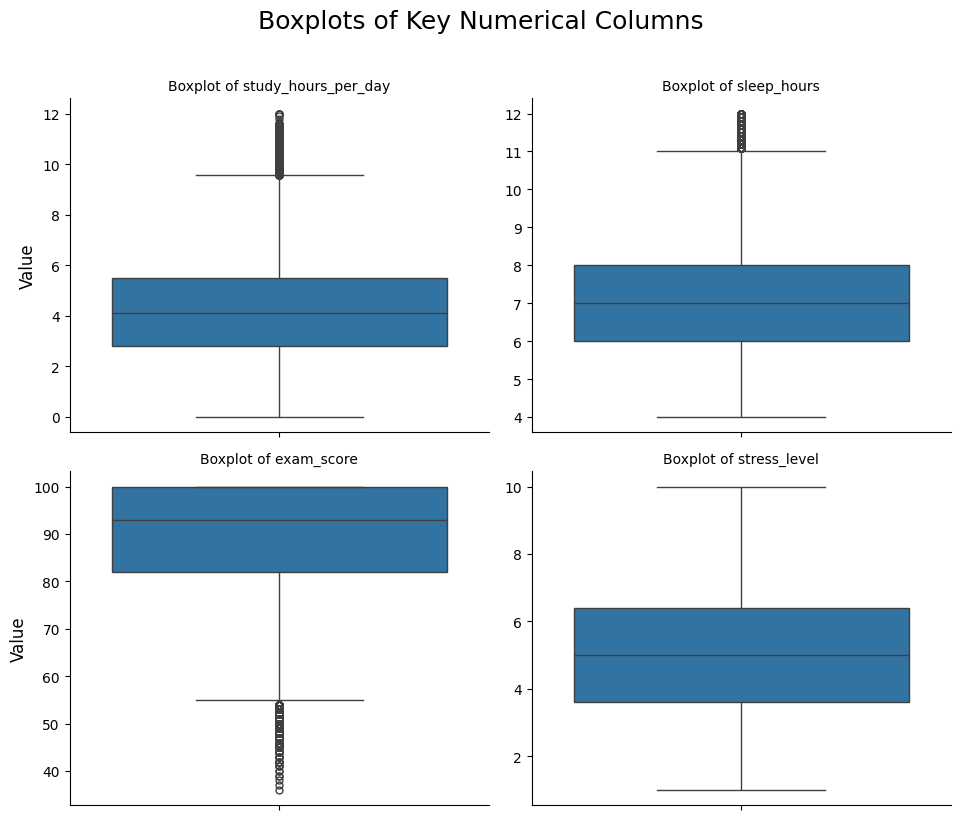

In [ ]:
# Select the numerical columns for boxplots from the current dataset
numerical_cols = ['study_hours_per_day', 'sleep_hours', 'exam_score', 'stress_level']


# Melt the DataFrame to long format for easier plotting with seaborn.catplot
df_melted = df[numerical_cols].melt(var_name='Variable', value_name='Value')

# Create boxplots using seaborn.catplot with a grid layout
g = sns.catplot(y='Value', col='Variable', data=df_melted, kind='box',
                col_wrap=2, height=4, aspect=1.2, sharey=False)

# Set titles and labels for the plots
g.set_titles("Boxplot of {col_name}", fontsize=50) # Increased title fontsize
g.set_axis_labels("", "Value", fontsize=12) # Clear x-axis labels and set a generic y-axis label with increased fontsize
plt.suptitle('Boxplots of Key Numerical Columns', y=1.02, fontsize=18) # Add a super title to the entire figure with increased fontsize

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

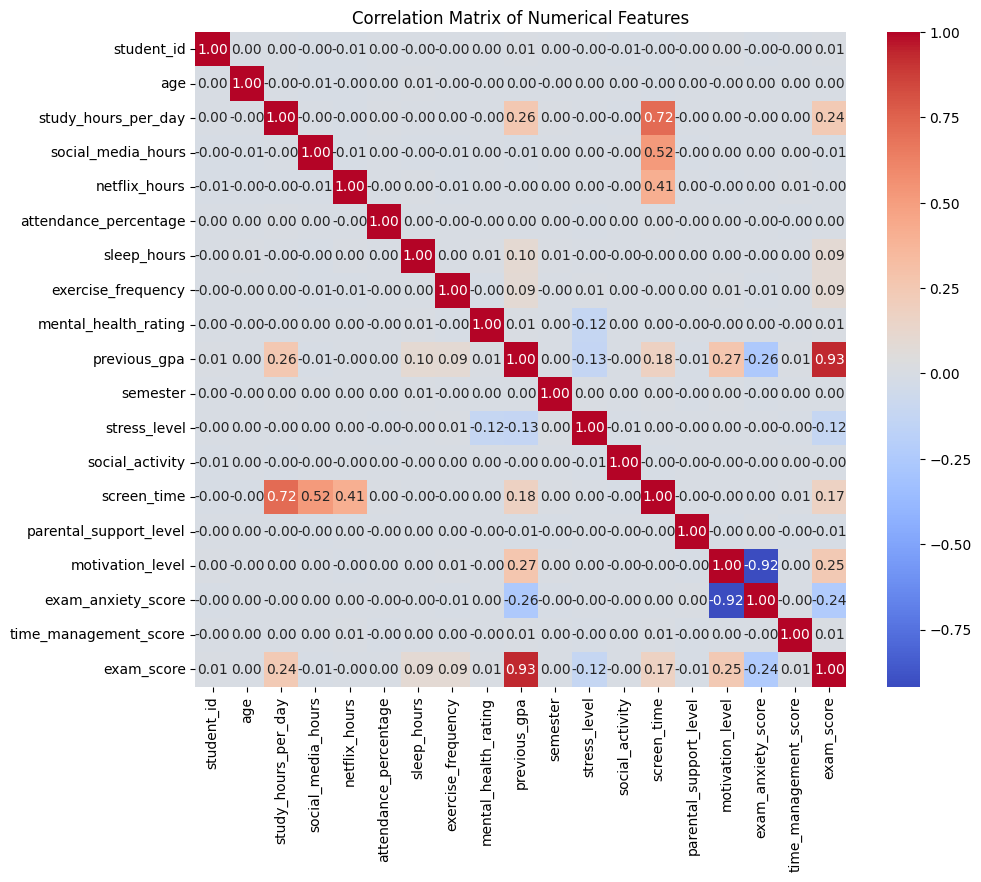

In [ ]:
numerical_df = df.select_dtypes(include=np.number)

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10.5, 8.5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#PCA

In [ ]:
#I used exam_scores as the y of that pca uses to color the groups together.
print("Exam score value counts:")
print(df['exam_score'].value_counts())

Exam score value counts:
exam_score
100    20612
98      3455
99      3362
97      3316
96      3070
       ...  
39         2
40         2
38         1
37         1
36         1
Name: count, Length: 65, dtype: int64


In [ ]:
#I created a new df with exam scores binned into 3 categories
bins = [0, 70, 88, 100]
labels = ['Low', 'Medium', 'High']
df2 = df.copy()
df2['exam_bin'] = pd.cut(df['exam_score'], bins=bins, labels=labels, include_lowest=True, right=True)


In [ ]:
#the pca model will be colored according to majors, the y
ypca = df2['exam_bin']
Xpca = df2.drop(columns=['exam_bin','exam_score'])

In [ ]:
#PCA can only be applied on numerical data so I converted all the categorial to dummy variable:
Xpca = pd.get_dummies(Xpca, drop_first=True)

In [ ]:
#scaled all the data so it is not skewed from the importes scaler earlier on.
X_scaledpca = sc_X.fit_transform(Xpca)

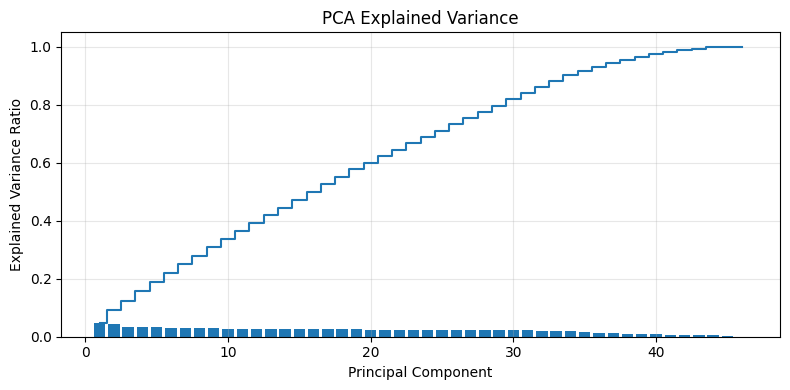

(array([0.04764966, 0.04348913, 0.03280754, 0.03275354, 0.03243714,
        0.03143792, 0.02955088, 0.02911128, 0.02895393, 0.02821238,
        0.027351  , 0.02732018, 0.02726847, 0.0270436 , 0.02699823,
        0.02674202, 0.02607122, 0.02599589, 0.02598329, 0.02345077,
        0.02212079, 0.02209194, 0.02201132, 0.02190461, 0.02186553,
        0.02176718, 0.02165113, 0.02161561, 0.02155247, 0.02150018,
        0.02147628, 0.02132102, 0.02068526, 0.02041877, 0.01551189,
        0.01259286, 0.01199875, 0.01089611, 0.01088341, 0.01083633,
        0.00717851, 0.00545173, 0.00541087, 0.00439259, 0.00176238,
        0.00047438]),
 array([0.04764966, 0.09113879, 0.12394633, 0.15669986, 0.189137  ,
        0.22057492, 0.2501258 , 0.27923708, 0.30819101, 0.33640339,
        0.36375439, 0.39107457, 0.41834303, 0.44538663, 0.47238486,
        0.49912689, 0.52519811, 0.551194  , 0.57717729, 0.60062807,
        0.62274886, 0.6448408 , 0.66685213, 0.68875674, 0.71062226,
        0.73238945, 0.7540

In [ ]:
#fitting the pca model:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaledpca)

explained_var = pca_full.explained_variance_ratio_

cum_explained = np.cumsum(explained_var)

plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_var) + 1), explained_var)
plt.step(range(1, len(cum_explained) + 1), cum_explained, where='mid')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

explained_var, cum_explained

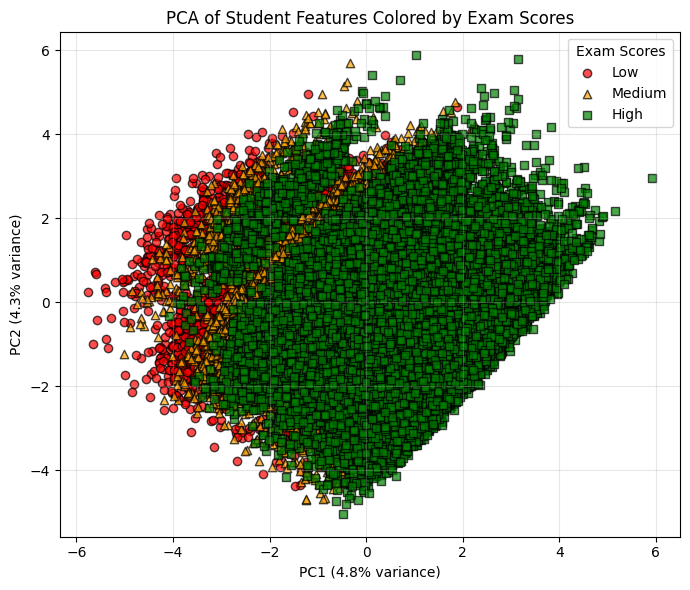

In [ ]:
pca_2 = PCA(n_components=2)
X_pca2 = pca_2.fit_transform(X_scaledpca)

# Build dataframe with PCs + major
pc_df = pd.DataFrame(X_pca2, columns=['PC1', 'PC2'])
pc_df['exam_bin'] = ypca.values

colors = {'Low': 'red', 'Medium': 'orange', 'High': 'green'}
markers = {'Low': 'o', 'Medium': '^', 'High': 's'}

plt.figure(figsize=(7, 6))
for label in ['Low', 'Medium', 'High']:
    subset = pc_df[pc_df['exam_bin'] == label]
    plt.scatter(subset['PC1'], subset['PC2'],
                c=colors[label], marker=markers[label],
                alpha=0.7, edgecolors='k', label=label)

pc1_var = pca_2.explained_variance_ratio_[0]
pc2_var = pca_2.explained_variance_ratio_[1]

plt.xlabel(f'PC1 ({pc1_var:.1%} variance)')
plt.ylabel(f'PC2 ({pc2_var:.1%} variance)')
plt.title('PCA of Student Features Colored by Exam Scores')
plt.legend(title='Exam Scores')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
loadings = pd.DataFrame(
    pca_2.components_.T,
    columns=['PC1', 'PC2'],
    index=Xpca.columns
)

top_n = 10
top_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(top_n)
top_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(top_n)

print("Top contributors to PC1:\n")
print(top_pc1)

print("\nTop contributors to PC2:\n")
print(top_pc2)

Top contributors to PC1:

motivation_level          0.469629
exam_anxiety_score        0.462398
screen_time               0.410584
previous_gpa              0.395095
study_hours_per_day       0.356756
social_media_hours        0.172139
dropout_risk_Yes          0.163266
major_Computer Science    0.134085
netflix_hours             0.134005
stress_level              0.082283
Name: PC1, dtype: float64

Top contributors to PC2:

screen_time               0.528886
motivation_level          0.439482
exam_anxiety_score        0.434868
study_hours_per_day       0.396929
social_media_hours        0.272318
netflix_hours             0.215976
major_Computer Science    0.154473
dropout_risk_Yes          0.152094
previous_gpa              0.053033
stress_level              0.050392
Name: PC2, dtype: float64


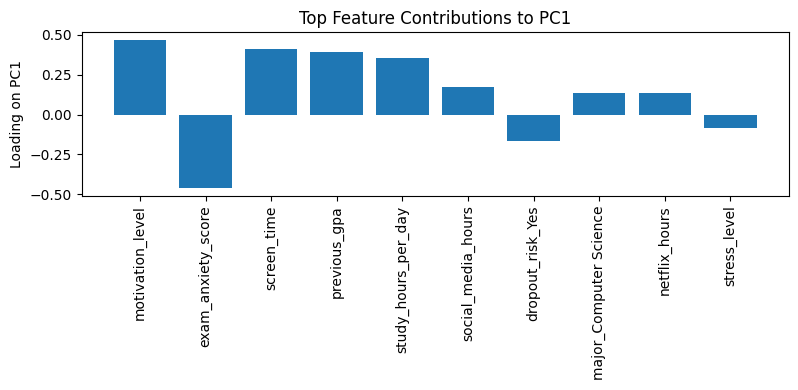

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(top_pc1.index, loadings.loc[top_pc1.index, 'PC1'])
plt.xticks(rotation=90)
plt.ylabel('Loading on PC1')
plt.title('Top Feature Contributions to PC1')
plt.tight_layout()
plt.show()

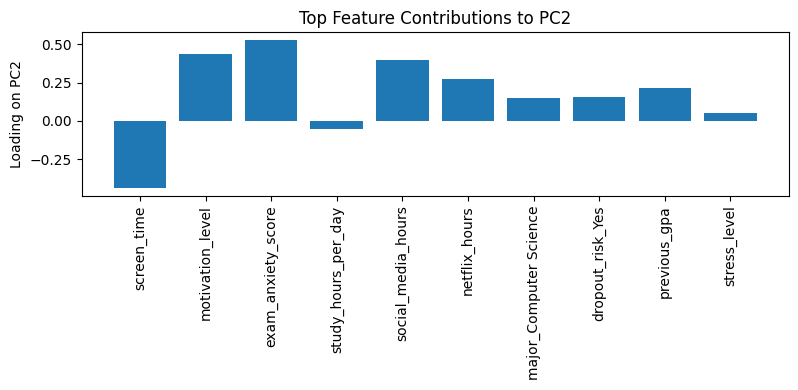

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(top_pc2.index, loadings.loc[top_pc1.index, 'PC2'])
plt.xticks(rotation=90)
plt.ylabel('Loading on PC2')
plt.title('Top Feature Contributions to PC2')
plt.tight_layout()
plt.show()

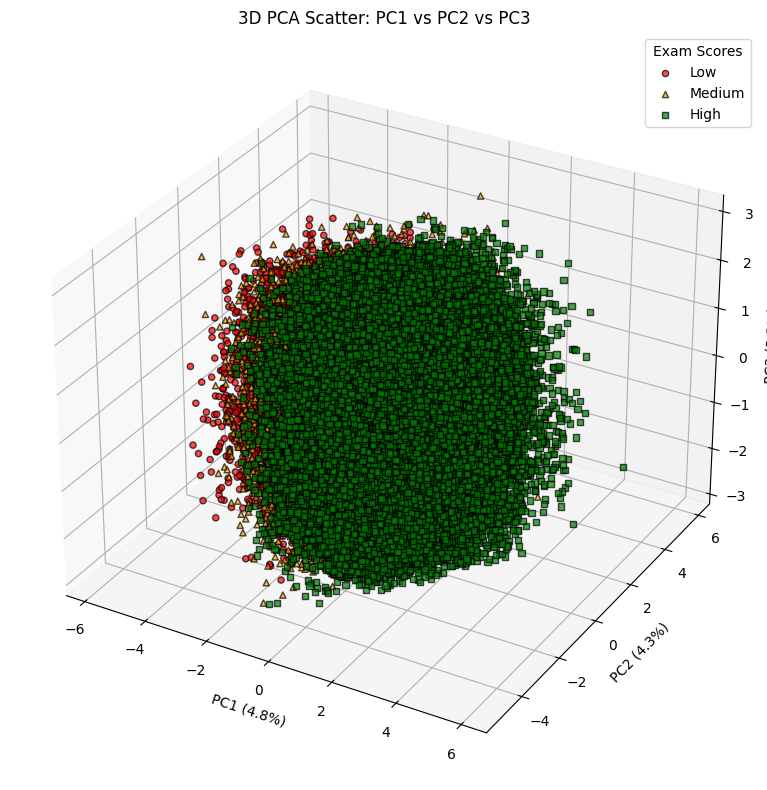

In [ ]:
# Refit PCA with 3 components
pca_3 = PCA(n_components=3)
X_pca3 = pca_3.fit_transform(X_scaledpca)

pc3_df = pd.DataFrame(X_pca3, columns=["PC1", "PC2", "PC3"])
pc3_df['exam_bin'] = ypca.values

# 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

colors = {'Low': 'red', 'Medium': 'orange', 'High': 'green'}
markers = {'Low': 'o', 'Medium': '^', 'High': 's'}

for label in ["Low", "Medium", "High"]:
    subset = pc3_df[pc3_df['exam_bin'] == label]
    ax.scatter(
        subset["PC1"],
        subset["PC2"],
        subset["PC3"],
        c=colors[label],
        marker=markers[label],
        edgecolor="k",
        alpha=0.7,
        label=label,
    )

ax.set_xlabel(f"PC1 ({pca_3.explained_variance_ratio_[0]:.1%})")
ax.set_ylabel(f"PC2 ({pca_3.explained_variance_ratio_[1]:.1%})")
ax.set_zlabel(f"PC3 ({pca_3.explained_variance_ratio_[2]:.1%})")
ax.set_title("3D PCA Scatter: PC1 vs PC2 vs PC3")
ax.legend(title="Exam Scores")

plt.tight_layout()
plt.show()

The first two principal components, PC1 and PC2, capture only a small fraction of the total variance in the data with its percentages being 4.8% and 4.3%. This suggests that the data is highly dispersed across many features, and a small number of components is not enough to summarize the dataset with high variance.





PC1 primary factors are motivation and anxiety. PC1's highest absolute loadings are on motivation_level, with 0.47, and exam_anxiety_score with a loading of -0.46. This shows that pc1 positive side constistes of high motivation and low anxiety and its negative PC1 score consists of low motivation and high anxiety.





PC2 primary factors are screen time, motivation level, and exam anxiety score. PC2 has its highest absolute loading on screen_time, 0.53, then, by motivation_level, 0.44, and exam_anxiety_score, 0.43.




The 2D and 3D scatter plots clearly show that students with Low Exam Scores tend to cluster on the negative side of PC1, and students with High Exam Scores (Green squares) are primarily concentrated on the positive side of PC1. This separation from PC1 shows that the combination of high motivation and high anxiety is associated with high exam performance.

# Random Forest Classifier


In [ ]:
#creating a copy of the df so the changes do not affect the other models
df_classification = df.copy()

In [ ]:
#Here I split into my x and y- what I want to predict
y = df_classification["major"]
X = df_classification.drop(columns=["major"])

In [ ]:
#I converted my prediction options into numeric values
y = y.map({'Computer Science': 1, 'Arts': 2, 'Psychology': 3, 'Business': 4, 'Engineering' : 5, 'Biology' :6})

In [ ]:
#Converting all the non-numeric X values into binary so I am able to use them in my model
X = pd.get_dummies(X, drop_first=True)
X.columns

Index(['student_id', 'age', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'attendance_percentage', 'sleep_hours',
       'exercise_frequency', 'mental_health_rating', 'previous_gpa',
       'semester', 'stress_level', 'social_activity', 'screen_time',
       'parental_support_level', 'motivation_level', 'exam_anxiety_score',
       'time_management_score', 'exam_score', 'gender_Male', 'gender_Other',
       'part_time_job_Yes', 'diet_quality_Good', 'diet_quality_Poor',
       'parental_education_level_High School',
       'parental_education_level_Master', 'parental_education_level_PhD',
       'parental_education_level_Some College', 'internet_quality_Low',
       'internet_quality_Medium', 'extracurricular_participation_Yes',
       'dropout_risk_Yes', 'study_environment_Co-Learning Group',
       'study_environment_Dorm', 'study_environment_Library',
       'study_environment_Quiet Room', 'access_to_tutoring_Yes',
       'family_income_range_Low', 'family_inco

In [ ]:
#Now for the modeling- the first step I did was train my data
#Our group decided to use the same random state and test size across the project
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=30) #stratifying

In [ ]:
#Fitting my data into the Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
#Esther Perlow
#stratification
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation
scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

print("Accuracy scores per fold:", scores)
print("Mean accuracy:", scores.mean() * 100, "%")

Accuracy scores per fold: [0.2038125 0.2089375 0.206625  0.20575   0.207375 ]
Mean accuracy: 20.65 %


In [ ]:
#Generating predictions and printing out the metrics
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy

*100, "%")

Accuracy: 20.3375 %


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.1927
Recall: 0.2034


In [ ]:
#Here I played with the parameters a bit to try and get my accuracy score up
RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2
)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100, "%")

Accuracy: 21.025 %


In [ ]:
#I decided to split it up again, giving it more training data, to see if that would effect the results
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=30, stratify=y)

In [ ]:
#Fitting my data into the Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
#Generating predictions and printing out the metrics
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy

*100, "%")

Accuracy: 20.645833333333332 %


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.1968
Recall: 0.2065


I did not initially want to predict major, but I tried a few options, and this had the best (or similar) classification results. Before I played around with the parameters, the accuracy was about 21%. Being that there are 6 Major options: Computer Science, Arts, Psychology, Business, Engineering and Biology, this is better than just guessing randomly (that would be about 16% accuracy). That being said, it is still not a great model. The precision was approximately 20.29%, meaning the model predicted the correct major only 20% of the time. 80% of the predictions were false positives. The recall was approximately 21.37%, meaning it was only able to find 21.37% of the actual positives in the dataset. There are a lot of false negatives. After giving the model some parameters, the accuracy decreased to 20%. I decided to retrain the model on more data to see if that would affect the results. I increased it to 30/70, but the results were just as low.
This means that with this dataset and these features, even a flexible model cannot predict major much better than chance. That suggests that the available features do not contain strong predictive information about a student’s major.




# Random Forest Regression Model


In [ ]:
# REGRESSION MODEL
# Target: exam_score

In [ ]:
# Select regression target
target_reg = "exam_score"
df_reg = df.copy()

# Drop ID column
df_reg = df_reg.drop(columns=["student_id"], errors='ignore')

In [ ]:
# Split X and y
y_reg = df_reg[target_reg]
X_reg = df_reg.drop(columns=[target_reg])

In [ ]:
# Convert categorical to numbers
X_reg = pd.get_dummies(X_reg, drop_first=True)

In [ ]:
# Train/Validation Split
train_X_reg, val_X_reg, train_y_reg, val_y_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=30)

In [ ]:
# Scaling
train_X_scaled = sc_X.fit_transform(train_X_reg)
val_X_scaled = sc_X.transform(val_X_reg)

In [ ]:
# Random Forest Regressor
rf_reg = RandomForestRegressor(
    n_estimators=50,    # fewer trees to train faster
    max_depth=10,        # limit tree depth
    random_state=30
)
rf_reg.fit(train_X_scaled, train_y_reg)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=30)

In [ ]:
# 5-Fold Cross-Validation
scoring = {
    'MAE': 'neg_mean_absolute_error',
    'RMSE': 'neg_mean_squared_error',
    'R2': 'r2'
}

cv_results = {
    k: cross_val_score(rf_reg, train_X_scaled, train_y_reg, cv=5, scoring=v).mean()
    for k, v in scoring.items()
}

print("CV MAE:", -cv_results['MAE'])
print("CV RMSE:", np.sqrt(-cv_results['RMSE']))
print("CV R²:", cv_results['R2'])

CV MAE: 3.2487369991026624
CV RMSE: 4.18243079317449
CV R²: 0.8703894457334644


In [ ]:
# Predictions and Evaluation
pred_reg = rf_reg.predict(val_X_scaled)

mae = mean_absolute_error(val_y_reg, pred_reg)
mse = mean_squared_error(val_y_reg, pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(val_y_reg, pred_reg)

print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")

MAE  : 3.18
MSE  : 16.73
RMSE : 4.09
R²   : 0.87


In [ ]:
# Hyperparameter Tuning
rf = RandomForestRegressor(
    n_estimators=10,
    max_depth=5,
    random_state=30
)

# Train
rf.fit(train_X_scaled, train_y_reg)

# Predict
pred = rf.predict(val_X_scaled)

# Evaluate
mae = mean_absolute_error(val_y_reg, pred)
rmse = np.sqrt(mean_squared_error(val_y_reg, pred))
r2 = r2_score(val_y_reg, pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 3.173279412438633
RMSE: 4.080709979747827
R²: 0.8737445285580819


The model predicts the exam_score with a mean absolute error (MAE) of 3.18, meaning on average the predictions are off by about 3.18 points, which indicates reasonably accurate predictions. The R² score of 0.87 shows the model explains 87% of the variance in exam scores, which is a strong indication of good model fit and predictive power. The relatively low RMSE of 4.09 suggests that large errors are limited, confirming the model’s predictions are consistently close to actual exam scores. The Random Forest was tuned by adjusting the number of trees and depth, which improved the predictions. R² improved slightly from 0.87 to 0.874 after hyperparameter tuning, confirming strong predictive performance. 5-fold cross-validation was applied, splitting the data into five parts so the model could be trained and tested multiple times, with the results averaged to give a more reliable measure of performance.



#Linear Regression

In [ ]:
df_lr = df.copy()


In [ ]:
# Next, I create an X with my features and a target y.
# I know that the other regression focused on exam_scores, which is why I decided to do my regression on screen_time
X = df_lr.drop('screen_time', axis=1)
y = df_lr['screen_time']


X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# First I scaled my values
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)



In [ ]:
#Then I fit it to a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Once it was fit, I generated predictions and calculated my metrics
y_pred = model.predict(X_test_scaled)

lr2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"R-squared: {lr2:.4f}\nMean squared error: {mse:.4f}\nRoot mean squared error: {rmse:.4f}")

R-squared: 0.9567
Mean squared error: 0.3385
Root mean squared error: 0.5818


In [ ]:
#To understand the RMSE in context of y, I ran some basic stats
print("Range of screen time:", y.max() - y.min())
summary = y.describe()
print(summary)

Range of screen time: 20.7
count    80000.000000
mean         9.673029
std          2.780869
min          0.300000
25%          7.800000
50%          9.700000
75%         11.600000
max         21.000000
Name: screen_time, dtype: float64


In [ ]:
#Then, because I was curious, I calculated the correlation to y with each feature of x
correlations_with_y = X.corrwith(y).sort_values(ascending=False)
print("Correlation of each feature with y:\n")
print(correlations_with_y)

Correlation of each feature with y:

study_hours_per_day                      0.717972
social_media_hours                       0.516475
netflix_hours                            0.409792
previous_gpa                             0.180460
exam_score                               0.169788
major_Computer Science                   0.122576
gender_Other                             0.006876
access_to_tutoring_Yes                   0.006360
time_management_score                    0.005030
diet_quality_Poor                        0.004893
attendance_percentage                    0.004889
parental_education_level_Some College    0.004780
semester                                 0.004584
study_environment_Dorm                   0.004511
dropout_risk_Yes                         0.003757
study_environment_Co-Learning Group      0.003275
learning_style_Visual                    0.002766
mental_health_rating                     0.002128
internet_quality_Medium                  0.001796
exam_anxiety_

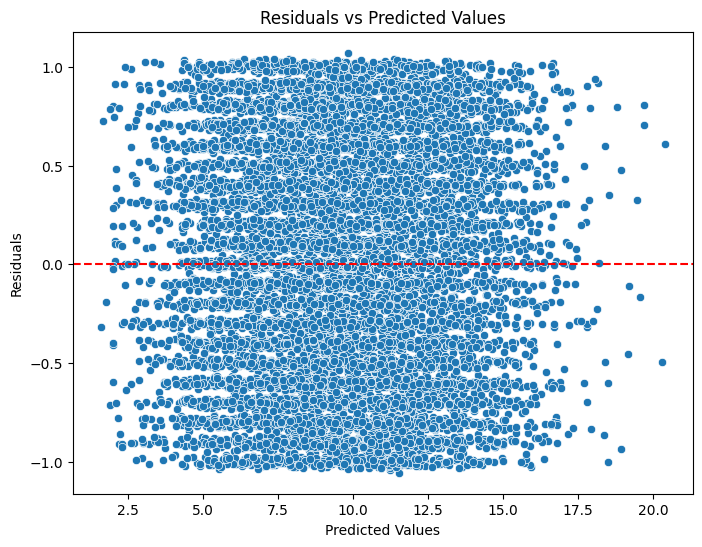

In [ ]:
# Finally, I computed the residuals and plotted them
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

When I set out to do this linear regression, I decided to try to predict screen time. There were a few columns on the dataset that seemed to be connected to screen time (like netflix_hours and social_media_hours), and I thought it would interesting to explore.
The metrics I got from my predictions were very interesting. The R squared value was .9567 which is very high. This means that the model predicts about 95% of variance. I scaled my input features, and my model predicted screen time with a root mean squared error of 0.58 hours, meaning predictions are typically within 35 minutes of the actual screen time. I then calculated what the range of my screen time is, to understand this in context. The range was 20.7 hours and the standard deviation is 2.78 hours, which means that 35 minutes is 3% of the total observed range and significantly less than the standard deviation. This indicates that the model is very accurate.
Next, I printed out the correlation of all my features with y. It was fascinating to see that the feature with the strongest correlation was study hours per day- not what I would have expected!
Finally, I plotted the residuals on a scatter plot. I was able to see that there is no obvious pattern or funnel shape; my model is not over or under predicting. Also, the spread around my line was very small, which matches with my low RMSE value.


# Clustering Model

In [ ]:
df_clustering = df.copy()
categorical_cols_to_encode = df_clustering.select_dtypes(include='object').columns
df_clustering = pd.get_dummies(df_clustering, columns=categorical_cols_to_encode, drop_first=True, dtype=int)
df_clustering_scaled = sc_X.fit_transform(df_clustering)
df_clustering_scaled = pd.DataFrame(df_clustering_scaled, columns=df_clustering.columns, index=df_clustering.index)

Figure out which number of clusters is the most optimal


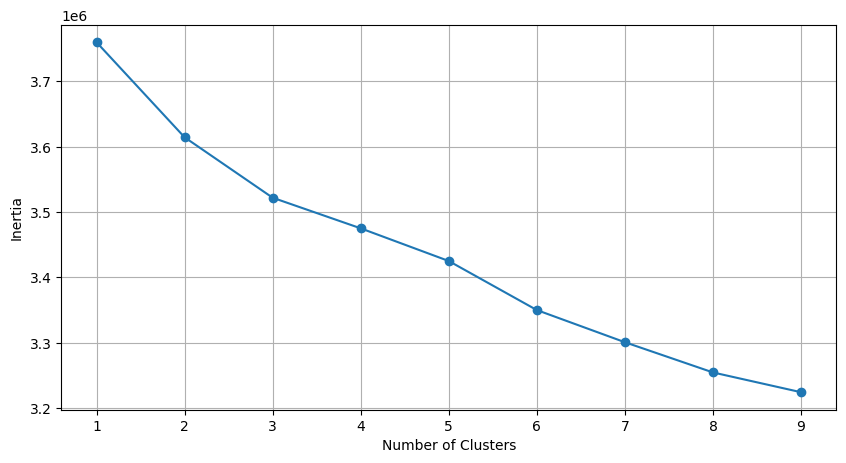

In [ ]:
print('Figure out which number of clusters is the most optimal')
def optimise_k_means(data, max_k):
    means=[]
    inertias=[]

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

optimise_k_means(df_clustering_scaled, 10)

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
kmeans.fit(df_clustering_scaled)

KMeans(n_clusters=3)

In [ ]:
df['kmeans_3'] = kmeans.labels_

In [ ]:
print('took the highest level features in pca 1 and used them as the selected features')
df_selected_features = df[['motivation_level', 'exam_anxiety_score', 'screen_time', 'study_hours_per_day', 'previous_gpa', 'social_media_hours']]


took the highest level features in pca 1 and used them as the selected features


In [ ]:
print('scaling the features so they are proportionate')
scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_selected_features)
df_selected_scaled = pd.DataFrame(df_selected_scaled, columns=df_selected_features.columns)

scaling the features so they are proportionate


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(df_selected_scaled)
df_selected_features['cluster_label'] = kmeans.labels_

/tmp/ipython-input-2878371930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features['cluster_label'] = kmeans.labels_


In [ ]:
df_selected_features = df[['motivation_level', 'exam_anxiety_score', 'screen_time', 'study_hours_per_day', 'previous_gpa', 'social_media_hours']].copy()


showing the difference in splitting the data into different amounts of clusters


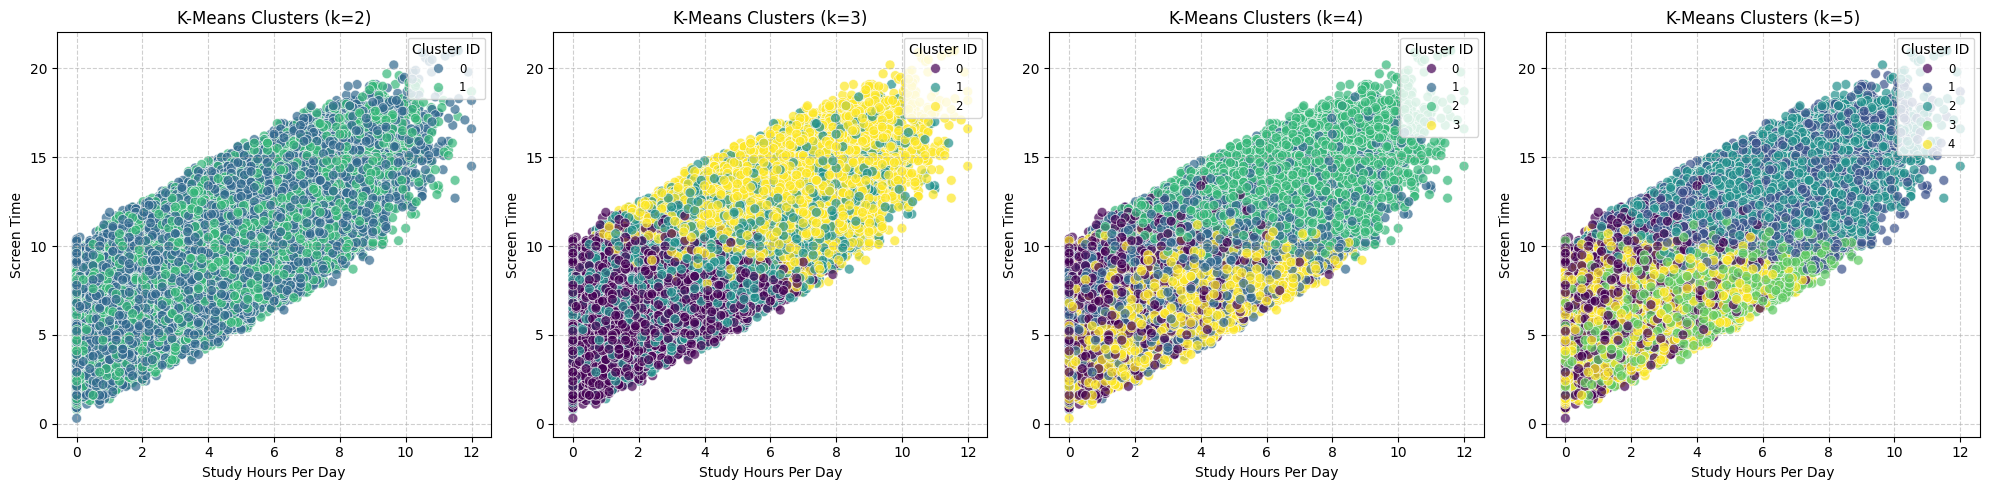

In [ ]:
print('showing the difference in splitting the data into different amounts of clusters')

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
axes = axes.flatten()
for i, k in enumerate(range(2, 6)):
    kmeans_k = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_k.fit(df_selected_scaled)

    pc_df_k = df_selected_features[['study_hours_per_day', 'screen_time']].copy()
    pc_df_k['Cluster'] = kmeans_k.labels_

    sns.scatterplot(
        x='study_hours_per_day',
        y='screen_time',
        hue='Cluster',
        data=pc_df_k,
        palette='viridis',
        s=50,
        alpha=0.7,
        ax=axes[i]
    )

    axes[i].set_xlabel('Study Hours Per Day')
    axes[i].set_ylabel('Screen Time')
    axes[i].set_title(f'K-Means Clusters (k={k})')
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].legend(title='Cluster ID', loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()


--- Visualizing K-Means with 3 Clusters - this is the most optimal amount of clusters---


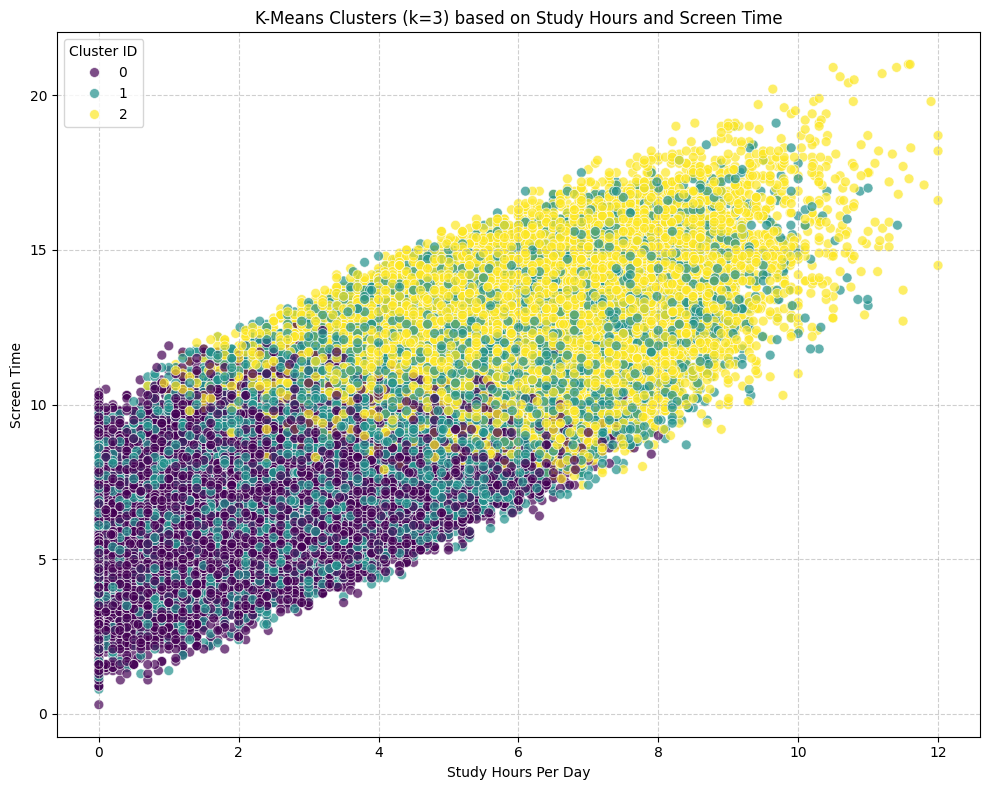

In [ ]:
print(f"\n--- Visualizing K-Means with 3 Clusters - this is the most optimal amount of clusters---")
k = 3
kmeans_k = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans_k.fit(df_selected_scaled)

pc_df_k = df_selected_features[['study_hours_per_day', 'screen_time']].copy()
pc_df_k['Cluster'] = kmeans_k.labels_

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='study_hours_per_day',
    y='screen_time',
    hue='Cluster',
    data=pc_df_k,
    palette='viridis',
    s=50,
    alpha=0.7
)

plt.xlabel('Study Hours Per Day')
plt.ylabel('Screen Time')
plt.title(f'K-Means Clusters (k={k}) based on Study Hours and Screen Time')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster ID')
plt.tight_layout()
plt.show()

In [ ]:
print('explaining the differences of the 3 plots and what sets each apart')

df_selected_features = df[['motivation_level', 'exam_anxiety_score', 'screen_time', 'study_hours_per_day', 'previous_gpa', 'social_media_hours', 'exam_score']].copy()

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_selected_features)
df_selected_scaled = pd.DataFrame(df_selected_scaled, columns=df_selected_features.columns)

k = 3
kmeans_k = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans_k.fit(df_selected_scaled)

df_selected_features['cluster_label'] = kmeans_k.labels_
cluster_means_selected = df_selected_features.groupby('cluster_label')[['motivation_level', 'exam_anxiety_score', 'screen_time', 'study_hours_per_day', 'previous_gpa', 'social_media_hours', 'exam_score']].mean()
print('Mean values of selected features per cluster:')
print(cluster_means_selected)

explaining the differences of the 3 plots and what sets each apart
Mean values of selected features per cluster:
               motivation_level  exam_anxiety_score  screen_time  \
cluster_label                                                      
0                      3.984275            9.475034     8.505449   
1                      3.646384            9.795424    10.351439   
2                      8.608143            6.391857     9.806067   

               study_hours_per_day  previous_gpa  social_media_hours  \
cluster_label                                                          
0                         3.162006      2.971538            2.407083   
1                         4.745047      3.832622            2.567663   
2                         4.308819      3.822401            2.499611   

               exam_score  
cluster_label              
0               73.552140  
1               94.983704  
2               94.407952  


Cluster 0 - Disengaged, Highly Anxious Students: show the least amount of engagement. They study the least and use screens the least. Their low motivation, combined with the highest anxiety, suggests they might be feeling overwhelmed or disengaged, with low study hours but still suffering from the pressure, as shown in the high anxiety.

Cluster 1 - High-Achieving, Motivated Students: These are students who are highly engaged and self-driven, leading to less stress and more effective use of their time. They manage to balance a high study load with moderate digital activity and achieve superior results.

Cluster 2 - Struggling, Distracted/Anxious Students: These students are likely struggling with procrastination and focus. They dedicate the most time to both studying and screens/social media. Their high study effort, coupled with low motivation and extreme anxiety, suggests their study time is inefficient, possibly due to frequent interruptions or ineffective study methods.

#Model Comparison and Discussion


| Model                     | Metric                  | Value    |
|:--------------------------|:------------------------|:---------|
| Random Forest Regressor   | MAE                     | 3.17     |
|                           | RMSE                    | 4.08     |
|                           | R²                      | 0.87     |
| Linear Regression         | R-squared               | 0.9567   |
|                           | MSE                     | 0.3385   |
|                           | RMSE                    | 0.5818   |
| Random Forest Classifier  | Accuracy                | 0.2084   |
|                           | Precision (weighted)    | 0.1977   |
|                           | Recall (weighted)       | 0.2084   |
| PCA                       | Explained Variance (PC1)| 0.0476   |
|                           | Explained Variance (PC2)| 0.0435   |
|                           | Total Explained Var (PC1+PC2) | 0.0911   |


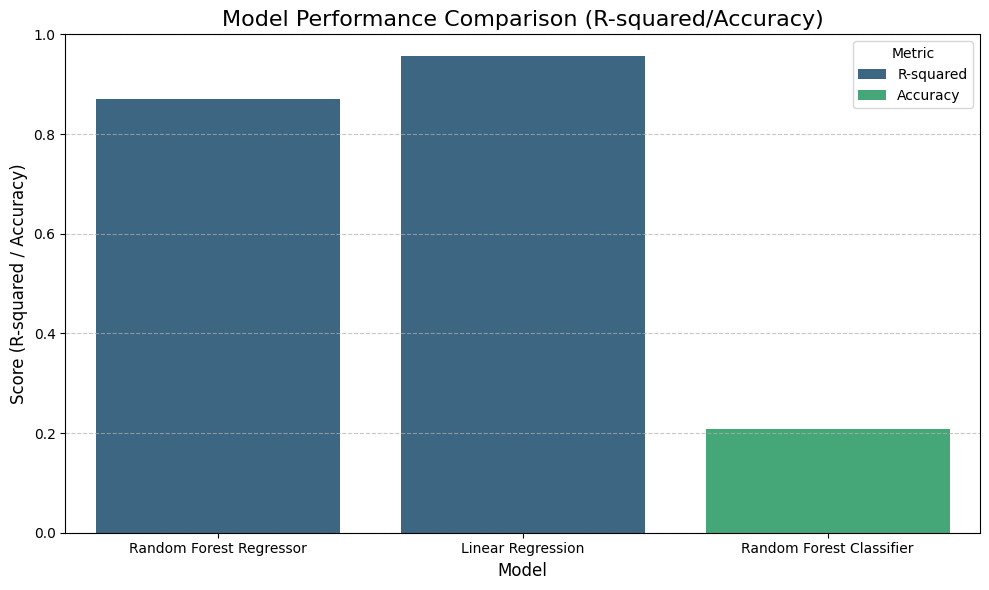

In [ ]:
model_metrics = pd.DataFrame({
    'Model': [
        'Random Forest Regressor', 'Random Forest Regressor', 'Random Forest Regressor',
        'Linear Regression', 'Linear Regression', 'Linear Regression',
        'Random Forest Classifier', 'Random Forest Classifier', 'Random Forest Classifier',
        'PCA', 'PCA', 'PCA'
    ],
    'Metric': [
        'MAE', 'RMSE', 'R-squared',
        'R-squared', 'MSE', 'RMSE',
        'Accuracy', 'Precision (weighted)', 'Recall (weighted)',
        'Explained Variance (PC1)', 'Explained Variance (PC2)', 'Total Explained Var (PC1+PC2)'
    ],
    'Value': [
        3.17, 4.08, 0.87,
        0.9567, 0.3385, 0.5818,
        0.2084, 0.1977, 0.2084,
        0.0476, 0.0435, 0.0911
    ]
})

comparison_metrics = model_metrics[
    ((model_metrics['Model'] == 'Random Forest Regressor') & (model_metrics['Metric'] == 'R-squared')) |
    ((model_metrics['Model'] == 'Linear Regression') & (model_metrics['Metric'] == 'R-squared')) |
    ((model_metrics['Model'] == 'Random Forest Classifier') & (model_metrics['Metric'] == 'Accuracy'))
].copy()

comparison_metrics.loc[comparison_metrics['Model'] == 'Random Forest Classifier', 'Metric'] = 'Accuracy'

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=comparison_metrics, palette='viridis', dodge=False)

plt.title('Model Performance Comparison (R-squared/Accuracy)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score (R-squared / Accuracy)', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The regression and classifiaction models were split using the test/train of X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42). The test size of .2 means that 20% of the data the model was trained on and 80% of the data was unseen to the model inorder to test the model. This was done to ensure that the model does not overfit the data and can generalize to new data.

For the random forest classifer, the stratify=y was added to the train_test_split funstion to ensure that the porportion of each feature was kept in the spliting of the data.This prevents the training or testing data to be skewed which can lead to unaccurate performance by the model.

For the random forest classifier, cross validation was added to see how well the model performed in regard to teh models accuracy. With cross validation of k = 5, the accuracy of the model resulted with 20.4%, when without cross validation, the accuracy of the model was 21%. Displaying that cross validation reduced its accuracy score but overall gives a better picture about the model's performance.

Overall, the 5 models executed are all vastly different with each having its own interpretations. At first glance, the linear regression model, with a r2 score of .956698, can be seen to have the highest results.

#The dataset's strong predictive capability for continuous outcomes like exam scores and screen time, contrasted with its poor performance on categorical predictions like student major.


